In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import helper_functions
from matplotlib.lines import Line2D
from scipy.stats import gaussian_kde
from matplotlib.patches import Patch

helper = helper_functions.HelperFunctions()

In [2]:
data_path = 'C:/Users/Arkady/Google Drive/data/beyond_the_reach'
figure_path = 'C:/Users/Arkady/Dropbox/Research/Journal papers/2018 Beyond the reach/figures'

figure_format = '.png'

index=['subj_id', 'task', 'trial_no']

choices = pd.read_csv(os.path.join(data_path, 'choices_processed.txt'))
dynamics = pd.read_csv(os.path.join(data_path, 'dynamics_processed.txt'))

choices = choices.set_index(index, drop=False)
dynamics = dynamics.set_index(index, drop=False)

dynamics = dynamics.join(choices.option_chosen)

dynamics['Lambda_q'] = choices['Lambda_q']
dynamics['Delta_q'] = choices['Delta_q']

In [3]:
dynamics_walking = dynamics.loc[dynamics.task=='walking', :]
dynamics_mouse = dynamics.loc[dynamics.task=='mouse', :]

choices_walking = choices.loc[choices.task=='walking', :]
choices_mouse = choices.loc[choices.task=='mouse', :]

# Mean trajectories

In [14]:
def get_average_trajectories(dynamics, variables):
    cols = dynamics.index.names + variables    
    dynamics_transposed = dynamics.groupby(by = cols). \
                    apply(lambda x: x.loc[:, ['x', 'y']].reset_index(drop=True).T)
    cols += ['x/y']
    dynamics_transposed.index.names = cols
    
    subj_mean_traj = dynamics_transposed.groupby(level=variables + ['x/y']).apply(np.mean).stack()
    
    subj_mean_traj.index.names = variables + ['x/y', 't']
    subj_mean_traj = subj_mean_traj.unstack('x/y')
    return subj_mean_traj

mean_traj_walking = get_average_trajectories(dynamics_walking, ['option_chosen', 'Delta_q'])
mean_traj_mouse = get_average_trajectories(dynamics_mouse, ['option_chosen', 'Delta_q'])

mean_traj_walking_no_com = get_average_trajectories(dynamics_walking[~choices_walking.is_com], 
                                                    ['option_chosen', 'Delta_q'])
mean_traj_mouse_no_com = get_average_trajectories(dynamics_mouse[~choices_mouse.is_com], 
                                                  ['option_chosen', 'Delta_q'])

C:\Users\Arkady\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: 'subj_id' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Arkady\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: 'task' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Arkady\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: 'trial_no' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Arkady\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: UserWarning: Boolean Series key 

In [27]:
def plot_mean_trajectories(mean_trajectories, var='Lambda_q', plot_bar=False):
    sns.set_palette('viridis')
    sns.set_context("notebook", font_scale=2.5)
    fig, ax = plt.subplots(1, figsize=(10, 10))
#     plt.set_cmap('viridis')
    ax.set_aspect(1, adjustable='datalim')
    colors = {'Low': 'C0',
              'Medium': 'C3',
              'High': 'C5'}
    
    for name, group in mean_trajectories.groupby(['option_chosen', var]):
        ax.plot(mean_trajectories.loc[name].x, mean_trajectories.loc[name].y, 
                lw=4, color=colors[name[1]])
    ax.text(s='Larger \nbut later', x=0.85, y=1.05, 
            horizontalalignment='center',verticalalignment='center', transform=ax.transAxes)
    ax.text(s='Smaller \nbut sooner', x=0.15, y=1.05, 
            horizontalalignment='center',verticalalignment='center', transform=ax.transAxes)
    
    if plot_bar:
        x_bar = [-0.2, 0.2]
        y_bar = -0.05
        ax.plot(x_bar, [y_bar, y_bar], lw=5, color='grey')
    
    ax.tick_params(axis='both', which='major')

    custom_lines = [Line2D([0], [0], color='C0', lw=4),
                    Line2D([0], [0], color='C3', lw=4),
                    Line2D([0], [0], color='C5', lw=4)]

    ax.legend(custom_lines, ['Low $\Delta$', 'Medium $\Delta$', 'High $\Delta$'], loc=5)
#     ax.legend()

C:\Users\Arkady\Anaconda3\lib\site-packages\matplotlib\figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "
C:\Users\Arkady\Anaconda3\lib\site-packages\matplotlib\figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


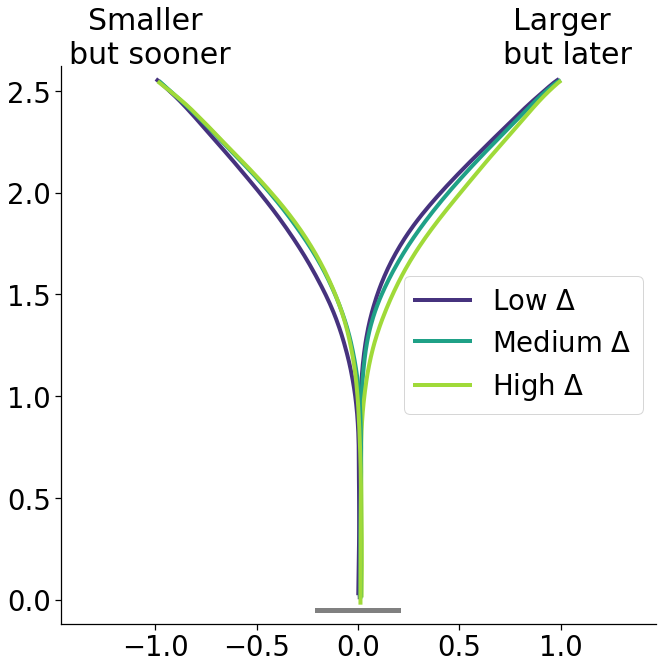

In [28]:
plot_mean_trajectories(mean_traj_walking, var='Delta_q', plot_bar=True)
plt.savefig(os.path.join(figure_path, 'mean_traj_walking'+figure_format))

C:\Users\Arkady\Anaconda3\lib\site-packages\matplotlib\figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "
C:\Users\Arkady\Anaconda3\lib\site-packages\matplotlib\figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


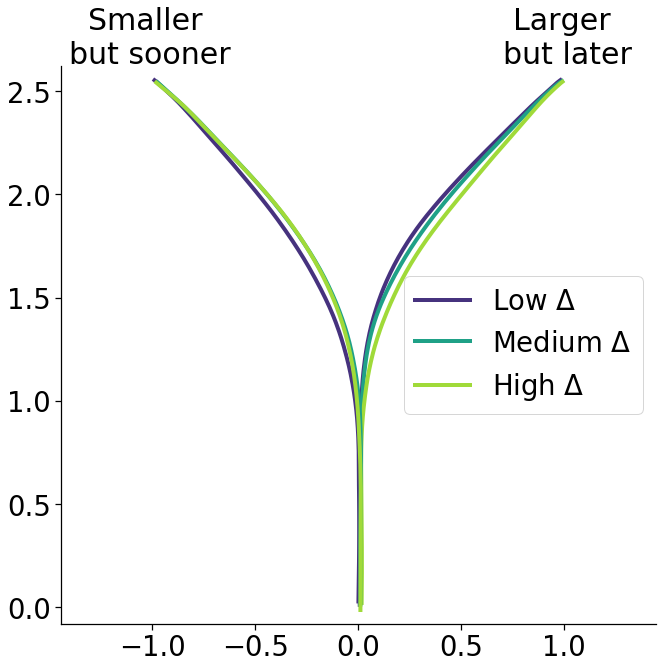

In [29]:
plot_mean_trajectories(mean_traj_walking_no_com, var='Delta_q')
plt.savefig(os.path.join(figure_path, 'mean_traj_walking_no_com'+figure_format))

C:\Users\Arkady\Anaconda3\lib\site-packages\matplotlib\figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "
C:\Users\Arkady\Anaconda3\lib\site-packages\matplotlib\figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


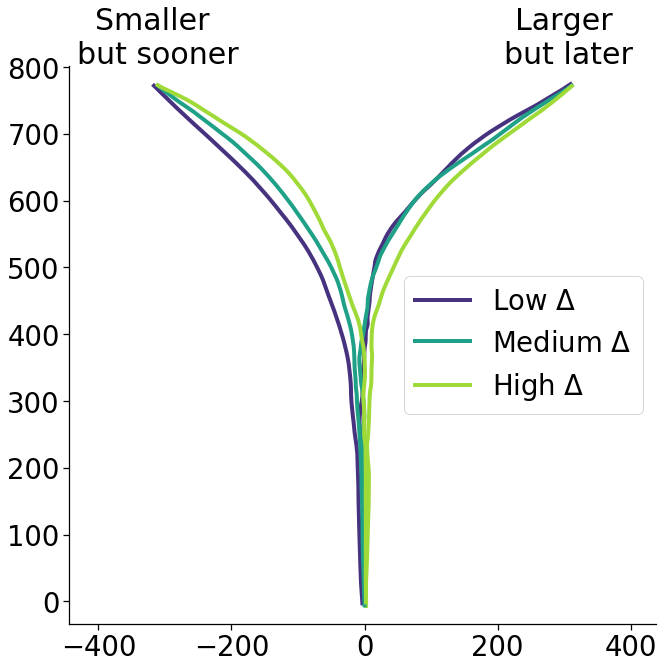

In [30]:
plot_mean_trajectories(mean_traj_mouse, var='Delta_q')
plt.savefig(os.path.join(figure_path, 'mean_traj_mouse'+figure_format))

C:\Users\Arkady\Anaconda3\lib\site-packages\matplotlib\figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "
C:\Users\Arkady\Anaconda3\lib\site-packages\matplotlib\figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


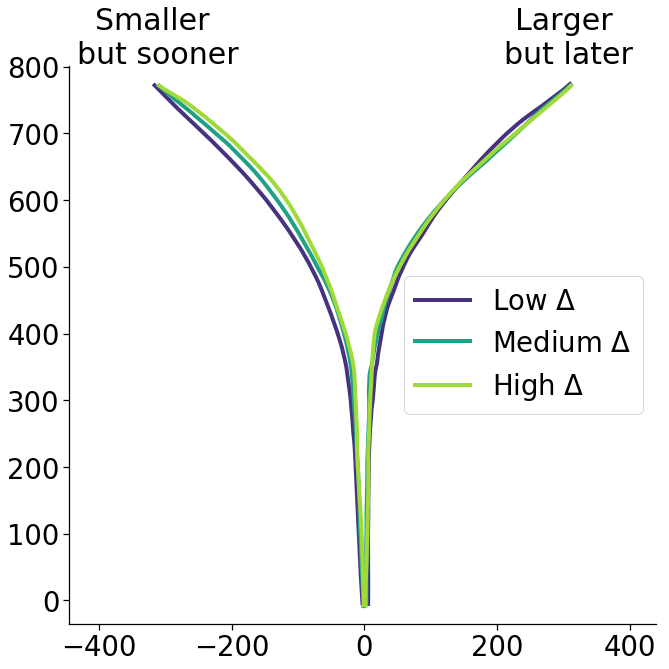

In [31]:
plot_mean_trajectories(mean_traj_mouse_no_com, var='Delta_q')
plt.savefig(os.path.join(figure_path, 'mean_traj_mouse_no_com'+figure_format))

# Regression plots

In [34]:
sns.set_palette('viridis')
sns.set_context("notebook", font_scale=1.5)

C:\Users\Arkady\Anaconda3\lib\site-packages\matplotlib\figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


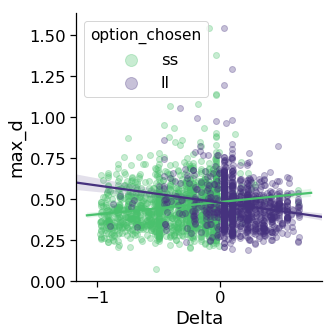

In [35]:
sns.lmplot(data=choices_walking, x='Delta', y='max_d', hue='option_chosen', 
           palette=dict(ss="C4", ll="C0"), legend_out=False, scatter_kws={'alpha':0.3})

C:\Users\Arkady\Anaconda3\lib\site-packages\matplotlib\figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


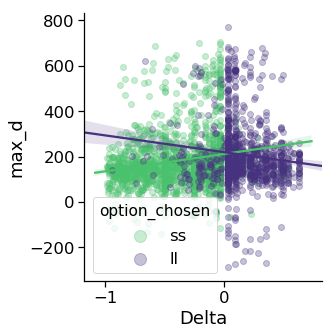

In [36]:
sns.lmplot(data=choices_mouse, x='Delta', y='max_d', hue='option_chosen', 
           palette=dict(ss="C4", ll="C0"), legend_out=False, scatter_kws={'alpha':0.3})

# Posterior plots

In [4]:
sns.set_palette('viridis')
sns.set_context("notebook", font_scale=1.2)

In [5]:
def plot_posterior_kde(posterior_samples, colors, alpha, ax):
    for choice in ['ss', 'll']:
        samples = posterior_samples.loc[posterior_samples.option_chosen==choice, 'beta']
        kde = gaussian_kde(samples)
        x_grid = np.linspace(samples.min(), samples.max(), 51)

        ax.plot(x_grid, kde(x_grid), color=colors[choice], alpha=alpha)

        ax.fill_between(x_grid, kde(x_grid), color=colors[choice], alpha=alpha,
                        where=(x_grid>samples.quantile(0.025))&(x_grid<samples.quantile(0.975)))

def plot_posterior_comparison(iv, task, dv, exclude_com, colors, ax):
    file_name = 'posterior_csv/%s/posterior_%s%s_%s.csv' % (iv, task, '_no_com' if exclude_com else '', dv)
    posterior_samples = (pd.read_csv(file_name)
                             .filter(regex=('b_%s:option_chosen.*' % (iv)))
                             .stack()
                             .reset_index()
                             .drop('level_0', axis=1)
                             .rename(index=str, columns={'level_1': 'option_chosen', 0: 'beta'}))
    posterior_samples['option_chosen'] = posterior_samples['option_chosen'].str[-2:]
    alpha = 0.3 if exclude_com else 0.9
    plot_posterior_kde(posterior_samples, colors, alpha, ax)
    
    x_max = 1.1*max(abs(posterior_samples.beta))
    ax.set_xlim((-x_max, x_max))
    ax.set_xlabel(r'$b_{\%s}$' % (iv))
    ax.set_ylabel('pdf')

def plot_all_posteriors(iv):
    colors={'ll': 'C0', 'ss': 'C4'}
    
    fig, axes = plt.subplots(2,2, figsize=(10,5))
    i = 0
    for task in ['walking', 'mouse']:
        for dv in ['max_d', 'RT']:
            ax = axes.flatten()[i]
            plot_posterior_comparison(iv, task, dv, exclude_com=True, colors=colors, ax=ax)
            plot_posterior_comparison(iv, task, dv, exclude_com=False, colors=colors, ax=ax)
            ax.set_title(task + ' ' + dv.replace('_', '-'))
            i+=1
    
    legend_elements = [Patch(facecolor=colors[choice], label=choice) for choice in ['ss', 'll']]

    fig.legend(handles=legend_elements, title='choice', loc='center left', 
               bbox_to_anchor=(0.9, 0.8), ncol=1, frameon=False)
    plt.tight_layout(pad=1.1, w_pad=0.1, h_pad=0.1)

    plt.savefig(os.path.join(figure_path, 'posterior_' + iv + figure_format), dpi=300)

C:\Users\Arkady\Anaconda3\lib\site-packages\matplotlib\figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "
C:\Users\Arkady\Anaconda3\lib\site-packages\matplotlib\figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "
C:\Users\Arkady\Anaconda3\lib\site-packages\matplotlib\figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


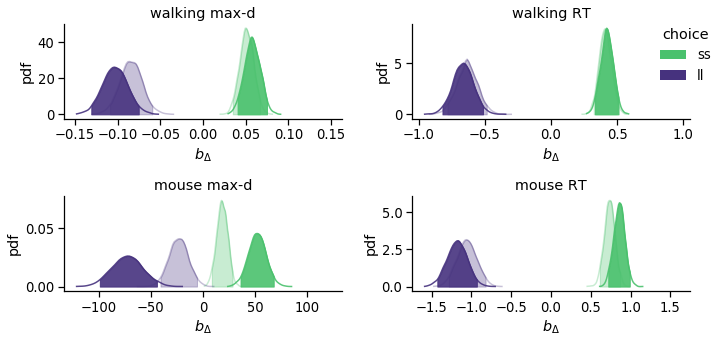

C:\Users\Arkady\Anaconda3\lib\site-packages\matplotlib\figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


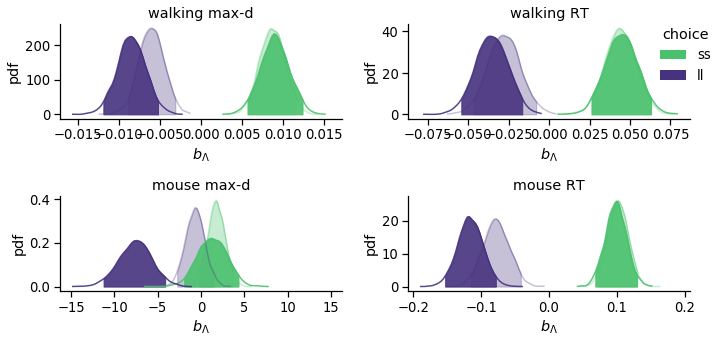

In [6]:
plot_all_posteriors(iv='Delta')

plot_all_posteriors(iv='Lambda')

# Descriptive statistics

Rate of changes-of-mind

In [5]:
len(choices_mouse[~choices_mouse.is_com])/len(choices_mouse)

0.9088353413654618

In [6]:
len(choices_walking[~choices_walking.is_com])/len(choices_walking)

0.9893920848633211

C:\Users\Arkady\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\Arkady\Anaconda3\lib\site-packages\matplotlib\figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "
C:\Users\Arkady\Anaconda3\lib\site-packages\matplotlib\figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


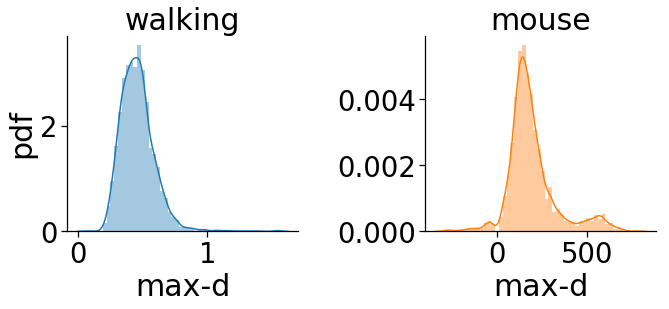

In [7]:
sns.set_palette("tab10")
sns.set_context("notebook", font_scale=2.5)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5)) 

sns.distplot(choices_walking.max_d, color='C0', ax=ax1)
ax1.set_xlabel('max-d')
ax1.set_ylabel('pdf')
ax1.set_title('walking')

sns.distplot(choices_mouse.max_d, color='C1', ax=ax2)
ax2.set_xlabel('max-d')
ax2.set_title('mouse')

plt.savefig(os.path.join(figure_path, 'max_d_distribution'+figure_format))

# Hypothesis 2

In [119]:
k_values_task, ip_task = helper.get_k_values(choices, by='task', log=False)
k_values_order, ip_order = helper.get_k_values(choices, by='order', log=False)

D:\source\beyond_the_reach\data_analysis\helper_functions.py:55: FutureWarning: 'subj_id' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version
  indiff_points = (choices_sc.groupby(['subj_id', by, 'll_delay'])
D:\source\beyond_the_reach\data_analysis\helper_functions.py:55: FutureWarning: 'task' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version
  indiff_points = (choices_sc.groupby(['subj_id', by, 'll_delay'])


In [152]:
def plot_discounting_and_k_hist(k_diff, indifference_points, by, palette, colors, log=False):
    sns.set_palette(palette)
    sns.set_context('notebook', font_scale=1.8)

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
    
    sns.lineplot(data=indifference_points, x='ll_delay', y='indiff_point', hue=by, style=by, 
                     marker='o', ms=10, markers=True, palette=colors, ax=ax1)
    ax1.set_ylim(0, 0.9)
    ax1.set_xlabel('delay')
    ax1.set_ylabel('subjective value')
    ax1.get_legend().texts[0].set_text(by)
    
    if(log):
        ax1.set_xscale('log')
        
    sns.distplot(k_diff, bins=np.linspace(-0.4, 0.4, 20), color='k', norm_hist=False, kde=False, ax=ax2)
    ax2.set_ylabel('number of subjects')
    ax2.axvline(0.0, alpha=0.3, color='k')
    
    return((ax1, ax2))  

C:\Users\Arkady\Anaconda3\lib\site-packages\matplotlib\figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "
C:\Users\Arkady\Anaconda3\lib\site-packages\matplotlib\figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


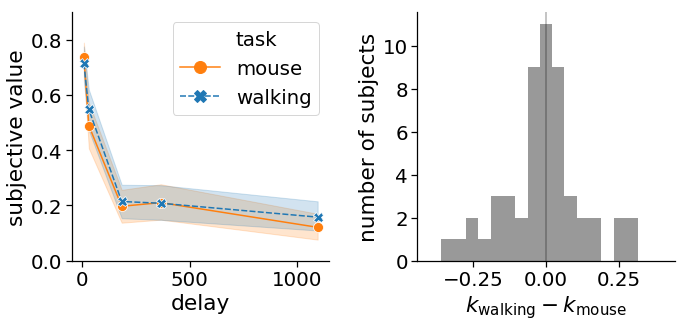

In [153]:
ax1, ax2 = plot_discounting_and_k_hist(k_diff = k_values_task['walking'] - k_values_task['mouse'], 
                                       indifference_points=ip_task, by='task', 
                                       palette='tab10', colors=['C1', 'C0'], log=False)

ax2.set_xlabel(r'$k_{\mathrm{walking}}-k_{\mathrm{mouse}}$');
plt.savefig(os.path.join(figure_path, 'k_task_prereg'+figure_format))

C:\Users\Arkady\Anaconda3\lib\site-packages\matplotlib\figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "
C:\Users\Arkady\Anaconda3\lib\site-packages\matplotlib\figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


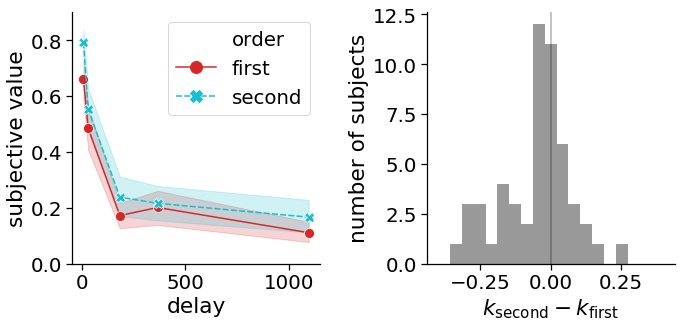

In [158]:
ax1, ax2 = plot_discounting_and_k_hist(k_diff = k_values_order['second'] - k_values_order['first'], 
                                       indifference_points=ip_order, by='order', 
                                       palette='tab10', colors=['C3', 'C9'], log=False)

ax2.set_xlabel(r'$k_{\mathrm{second}}-k_{\mathrm{first}}$');
plt.savefig(os.path.join(figure_path, 'k_order_prereg'+figure_format))

# Hypothesis 2 (exploratory)

In [ ]:
k_values_task_log, ip_task = helper.get_k_values(choices, by='task', log=True)
k_values_order_log, ip_order = helper.get_k_values(choices, by='order', log=True)

C:\Users\Arkady\Anaconda3\lib\site-packages\matplotlib\figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "
C:\Users\Arkady\Anaconda3\lib\site-packages\matplotlib\figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


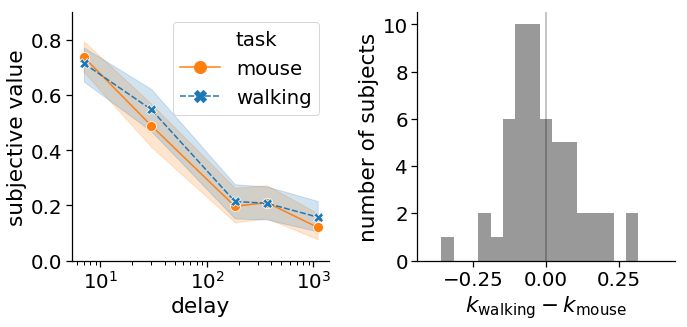

In [154]:
ax1, ax2 = plot_discounting_and_k_hist(k_diff = k_values_task_log['walking'] - k_values_task_log['mouse'], 
                                       indifference_points=ip_task, by='task', 
                                       palette='tab10', colors=['C1', 'C0'], log=True)

ax2.set_xlabel(r'$k_{\mathrm{walking}}-k_{\mathrm{mouse}}$');
plt.savefig(os.path.join(figure_path, 'k_task_log'+figure_format))

C:\Users\Arkady\Anaconda3\lib\site-packages\matplotlib\figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "
C:\Users\Arkady\Anaconda3\lib\site-packages\matplotlib\figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


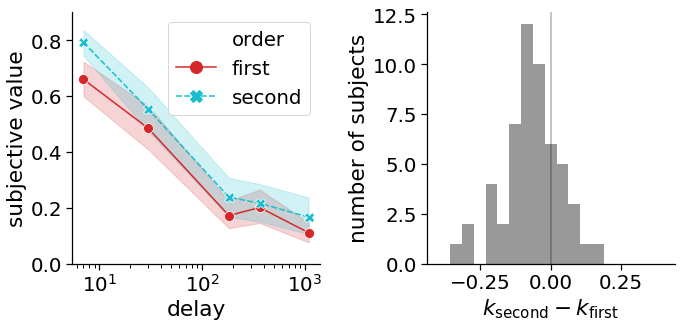

In [157]:
ax1, ax2 = plot_discounting_and_k_hist(k_diff = k_values_order_log['second'] - k_values_order_log['first'], 
                                       indifference_points=ip_order, by='order', 
                                       palette='tab10', colors=['C3', 'C9'], log=True)

ax2.set_xlabel(r'$k_{\mathrm{second}}-k_{\mathrm{first}}$');
plt.savefig(os.path.join(figure_path, 'k_order_log'+figure_format))

# Different plot layout

In [8]:
def plot_discounting_curves(indifference_points, by, colors):
    sns.set_palette('tab10')
    sns.set_context('notebook', font_scale=1.8)

    fig, axes = plt.subplots(1, 2, figsize=(10, 5))

    for ax in axes:
        sns.lineplot(data=indifference_points, x='ll_delay', y='indiff_point', hue=by, style=by, 
                     marker='o', ms=10, markers=True, palette=colors, ax=ax)
        ax.set_ylim(0, 0.9)
        ax.set_xlabel('delay')

    axes[0].set_ylabel('subjective value')
    axes[0].get_legend().texts[0].set_text(by)
    axes[1].set_ylabel('')
    axes[1].get_legend().remove()
    axes[1].set_xscale('log')
    plt.savefig(os.path.join(figure_path, 'discounting_'+by+figure_format))

D:\source\beyond_the_reach\data_analysis\helper_functions.py:55: FutureWarning: 'subj_id' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version
  indiff_points = (choices_sc.groupby(['subj_id', by, 'll_delay'])
D:\source\beyond_the_reach\data_analysis\helper_functions.py:55: FutureWarning: 'task' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version
  indiff_points = (choices_sc.groupby(['subj_id', by, 'll_delay'])
C:\Users\Arkady\Anaconda3\lib\site-packages\matplotlib\figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "
C:\Users\Arkady\Anaconda3\lib\site-packages\matplotlib\figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  wa

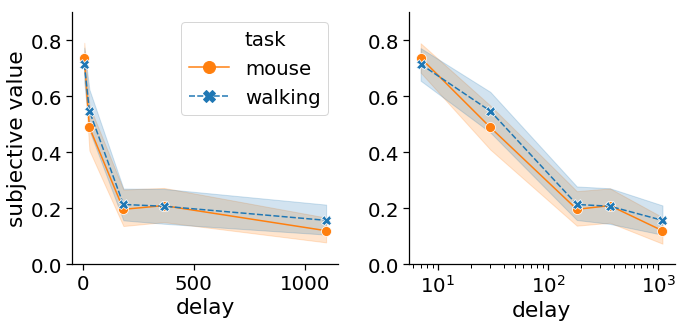

In [9]:
plot_discounting_curves(ip_task, by='task', colors=['C1', 'C0'])

C:\Users\Arkady\Anaconda3\lib\site-packages\matplotlib\figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "
C:\Users\Arkady\Anaconda3\lib\site-packages\matplotlib\figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


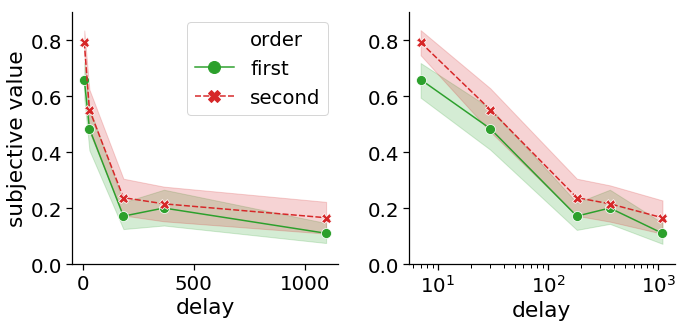

In [10]:
k_values_order, ip_order = helper.get_k_values(choices, by='order', log=False)
plot_discounting_curves(ip_order, by='order', colors=['C2', 'C3'])

C:\Users\Arkady\Anaconda3\lib\site-packages\matplotlib\figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


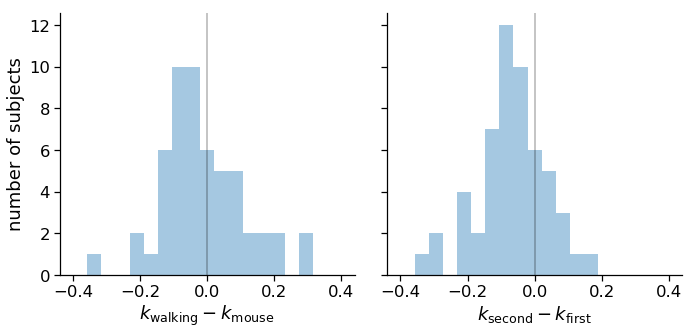

In [89]:
sns.set_context('notebook', font_scale=1.5)
plt.rc('text', usetex=False)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (10, 5), sharex=True, sharey=True)
sns.distplot(k_values_task_log['task_diff'], bins=np.linspace(-0.4, 0.4, 20), norm_hist=False, kde=False, ax=ax1)
sns.distplot(k_values_order_log['order_diff'], bins=np.linspace(-0.4, 0.4, 20), norm_hist=False, kde=False, ax=ax2)

ax1.set_xlabel(r'$k_{\mathrm{walking}}-k_{\mathrm{mouse}}$')
ax2.set_xlabel(r'$k_{\mathrm{second}}-k_{\mathrm{first}}$')

ax1.set_ylabel('number of subjects')

ax1.axvline(0.0, alpha=0.3, color='k')
ax2.axvline(0.0, alpha=0.3, color='k')

In [66]:
from scipy import stats

def print_ttest_results(x):
    print(stats.ttest_1samp(x, 0))
    print('Effect size %.4f' % (x.mean()/x.std()))

print_ttest_results(k_values_task_log['task_diff'])
print_ttest_results(k_values_order_log['order_diff'])

Ttest_1sampResult(statistic=-0.8399103463427159, pvalue=0.4047316099729724)
Effect size -0.1143
Ttest_1sampResult(statistic=-4.749600976982611, pvalue=1.5924348321583225e-05)
Effect size -0.6463


# Frequency of changes-of-minds

C:\Users\Arkady\Anaconda3\lib\site-packages\matplotlib\figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "
C:\Users\Arkady\Anaconda3\lib\site-packages\matplotlib\figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


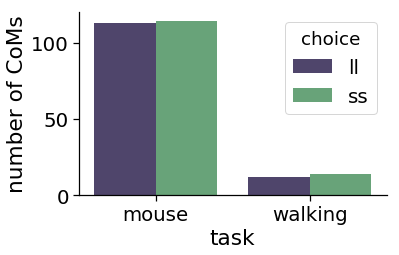

In [5]:
sns.set_palette('viridis')
sns.set_context('notebook', font_scale=1.8)
ax = sns.countplot(data=choices[choices.is_com], x='task', hue='option_chosen', palette=['C0', 'C4'], saturation=0.5)
# ax.set_xlabel('task')
ax.get_legend().set_title('choice')
ax.set_ylabel('number of CoMs')
# plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.savefig(os.path.join(figure_path, 'com_freq'+figure_format))

Dshemuchadze et al suggest that there is bias (trajectories are more direct towards the SS option), O'Hora et al suggest that there is bias towards LL. The direction of the bias might affect the difference between the tasks. However, in the mouse task there is no bias in RT

In [116]:
file_name = 'posterior_csv/%s/posterior_%s%s_%s.csv' % ('Delta', 'walking', '', 'rt')
posterior_samples = (pd.read_csv(file_name)
                         .filter(regex=(',option_chosenss]'))
                         .stack()
                         .reset_index()
                         .drop('level_0', axis=1))
#                          .rename(index=str, columns={'level_1': 'option_chosen', 0: 'beta'}))
# posterior_samples['option_chosen'] = posterior_samples['option_chosen'].str[-2:]